<a href="https://colab.research.google.com/github/LuellaS/testRepo/blob/main/Praca_domowa2_24_11_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
%matplotlib inline


**Simple visualization and classification of the digits dataset**
=============================================================

Do a simple MLP classification of 28x28 MNIST dataset

*Marcin Wolter*



In [16]:
#import packages and load datasets

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split


# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.


# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, train_size=0.5)




Plot the data: images of digits
-------------------------------

Each data in a 28x28 image

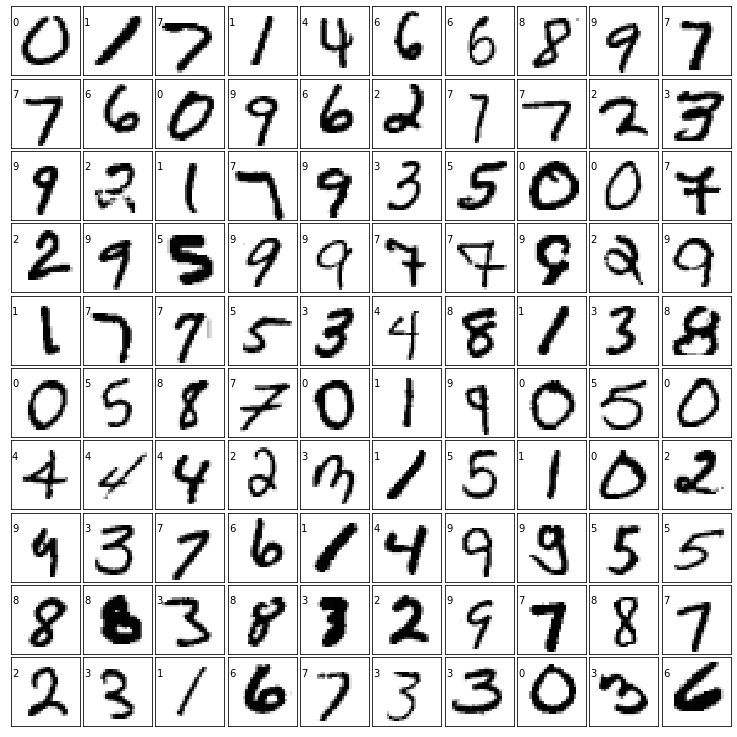

In [ ]:
# leave empty for time beeing

## **Classify with MLP**

In [17]:

# tu musimy zdefiniować klasyfikator, wytrenowaći sprawdzić "score" dla 
# danych testowych
#Proponowane parametry sieci: ukryte warstwy [100,100],solver adam, verbose=10 
clf = MLPClassifier(hidden_layer_sizes=(100,100), solver='adam', verbose=10, validation_fraction=0.2, early_stopping=True)
                     
print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test




Iteration 1, loss = 0.57008237
Validation score: 0.923429
Iteration 2, loss = 0.21657946
Validation score: 0.941714
Iteration 3, loss = 0.15983995
Validation score: 0.953714
Iteration 4, loss = 0.12576410
Validation score: 0.952429
Iteration 5, loss = 0.10393256
Validation score: 0.959143
Iteration 6, loss = 0.08741197
Validation score: 0.960571
Iteration 7, loss = 0.07475410
Validation score: 0.960000
Iteration 8, loss = 0.06176910
Validation score: 0.964857
Iteration 9, loss = 0.05386760
Validation score: 0.966286
Iteration 10, loss = 0.04340360
Validation score: 0.965429
Iteration 11, loss = 0.03658146
Validation score: 0.968571
Iteration 12, loss = 0.03156726
Validation score: 0.967000
Iteration 13, loss = 0.02636383
Validation score: 0.967286
Iteration 14, loss = 0.02340243
Validation score: 0.969286
Iteration 15, loss = 0.01899577
Validation score: 0.968000
Iteration 16, loss = 0.01561696
Validation score: 0.969714
Iteration 17, loss = 0.01339340
Validation score: 0.968571
Iterat

# **Plot loss**
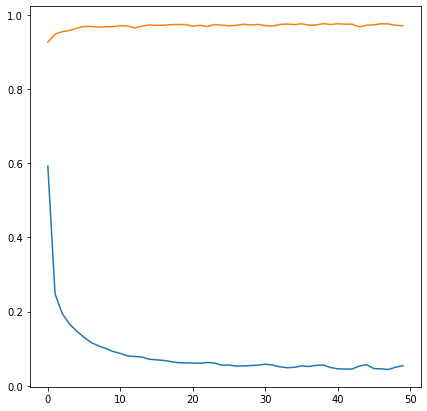

[0.9234285714285714, 0.9417142857142857, 0.9537142857142857, 0.9524285714285714, 0.9591428571428572, 0.9605714285714285, 0.96, 0.9648571428571429, 0.9662857142857143, 0.9654285714285714, 0.9685714285714285, 0.967, 0.9672857142857143, 0.9692857142857143, 0.968, 0.9697142857142858, 0.9685714285714285, 0.9697142857142858, 0.971, 0.9628571428571429, 0.9688571428571429, 0.9698571428571429, 0.9707142857142858, 0.97, 0.97, 0.9708571428571429, 0.9695714285714285, 0.9687142857142857, 0.9708571428571429, 0.971]


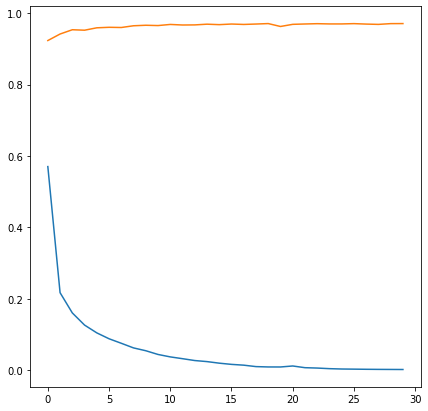

In [18]:
# tu rysujemy loss i validation score
# zostawiamy na razie puste
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

#**Plot results**
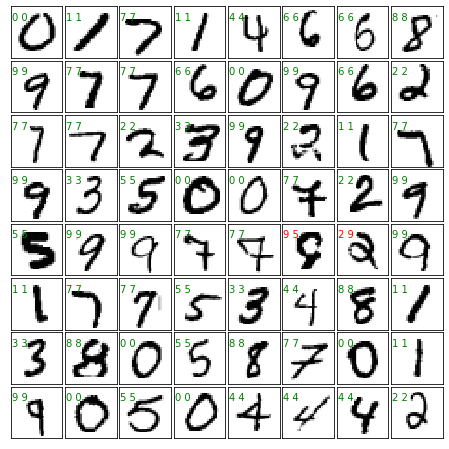

In [ ]:
# Plot the prediction

# Tu rysujemy cyfry z wynikami
# na razie zostawiamy puste

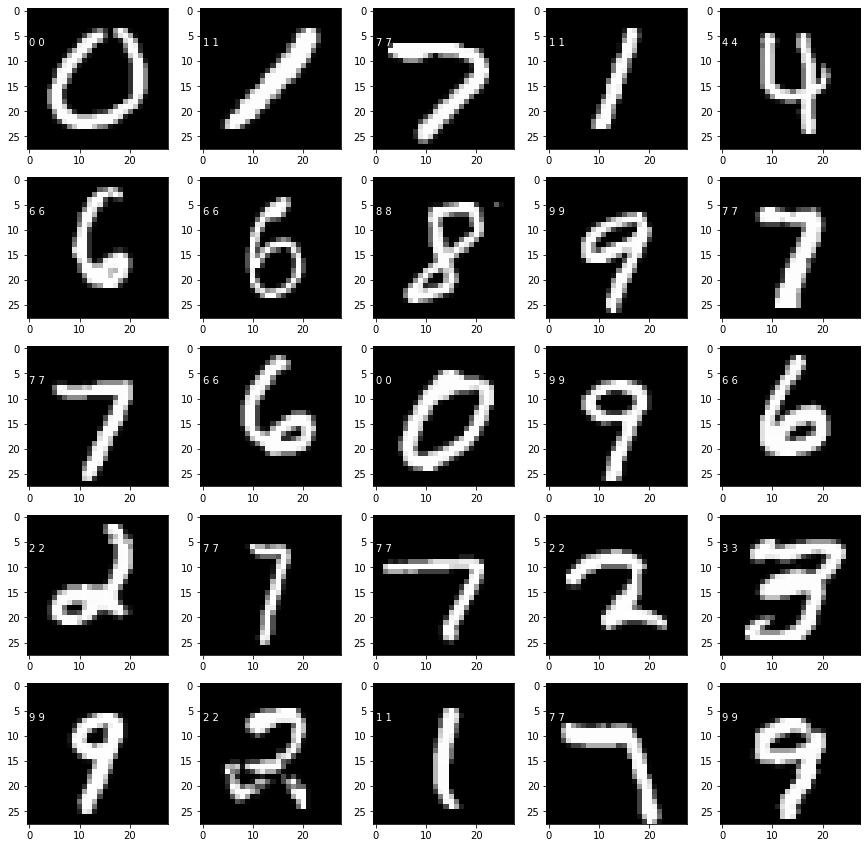

In [19]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(15, 15)) # figure size in inches
 
for i in range(25):
 ax = fig.add_subplot(5, 5, i + 1)
 ax.imshow(X_test[i].reshape(28,28), cmap=plt.cm.gray, interpolation='nearest')
 if expected[i]==predicted[i]:
    ax.text(0, 7, str(expected[i])+" "+str(predicted[i]), color='white')
 else:
    ax.text(0, 7, str(expected[i])+" "+str(predicted[i]), color='red')    

Print the classification report



In [20]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3409
           1       0.98      0.98      0.98      3949
           2       0.97      0.97      0.97      3500
           3       0.96      0.96      0.96      3557
           4       0.96      0.97      0.97      3398
           5       0.97      0.95      0.96      3203
           6       0.98      0.98      0.98      3444
           7       0.96      0.97      0.97      3637
           8       0.97      0.94      0.96      3437
           9       0.95      0.96      0.95      3466

    accuracy                           0.97     35000
   macro avg       0.97      0.97      0.97     35000
weighted avg       0.97      0.97      0.97     35000



# **Print the confusion matrix (expected true label vs. the reconstructed label)**



In [21]:
print(metrics.confusion_matrix(expected, predicted))



[[3347    1    8    4    3    6   17    8    3   12]
 [   1 3889   18    8    6    1    3    8    8    7]
 [  14   11 3379   22   18    1    8   36    8    3]
 [   2    7   24 3419    2   31    3   26   21   22]
 [   2   10    9    0 3312    0   11   15    5   34]
 [  17    6    5   48    6 3045   24    9   20   23]
 [  17    8    5    0   19   16 3369    1    9    0]
 [   2   11   17    5   17    2    0 3545    1   37]
 [  24   26   25   43   12   16   18   13 3221   39]
 [   7    7    1   21   47    8    2   36   12 3325]]


# **Repeat the same classification for faces**

In [8]:

####################################################
# Load dataset with faces
from sklearn.datasets import fetch_lfw_people

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.50)  
print(lfw_people.images.shape)


# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
# to get real names, not digits
target_names = lfw_people.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print("Image shape: ",X_train.shape)
# dimension of face image
nfaces, h, w = lfw_people.images.shape
print("Image shape: ", h, w)

(1140, 62, 47)
Image shape:  (855, 2914)
Image shape:  62 47


Plot the data: images of faces
-------------------------------

Each data in a 32x24 image

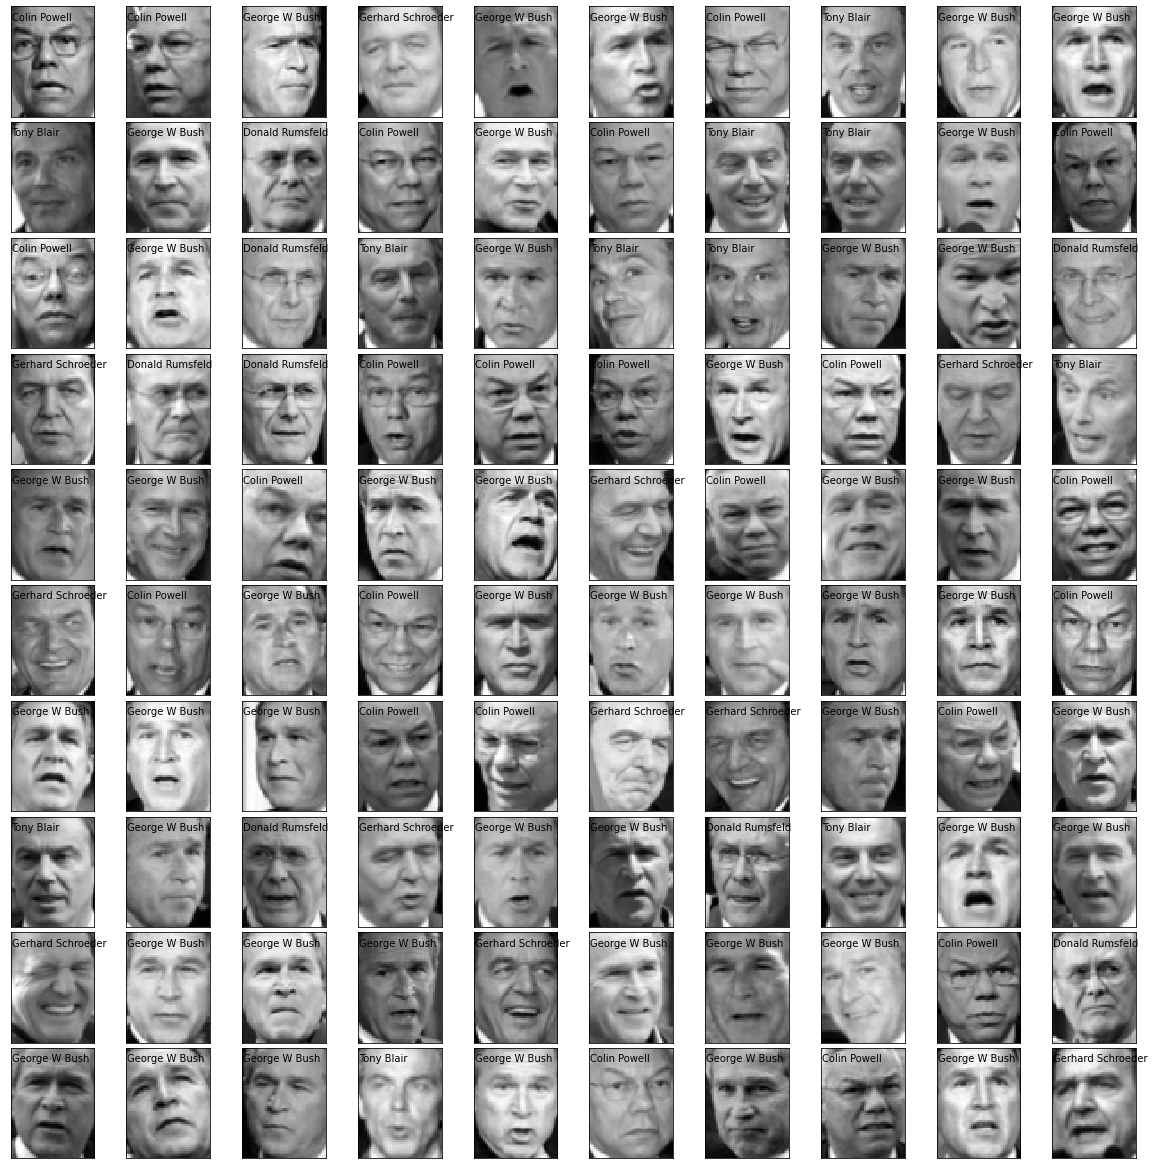

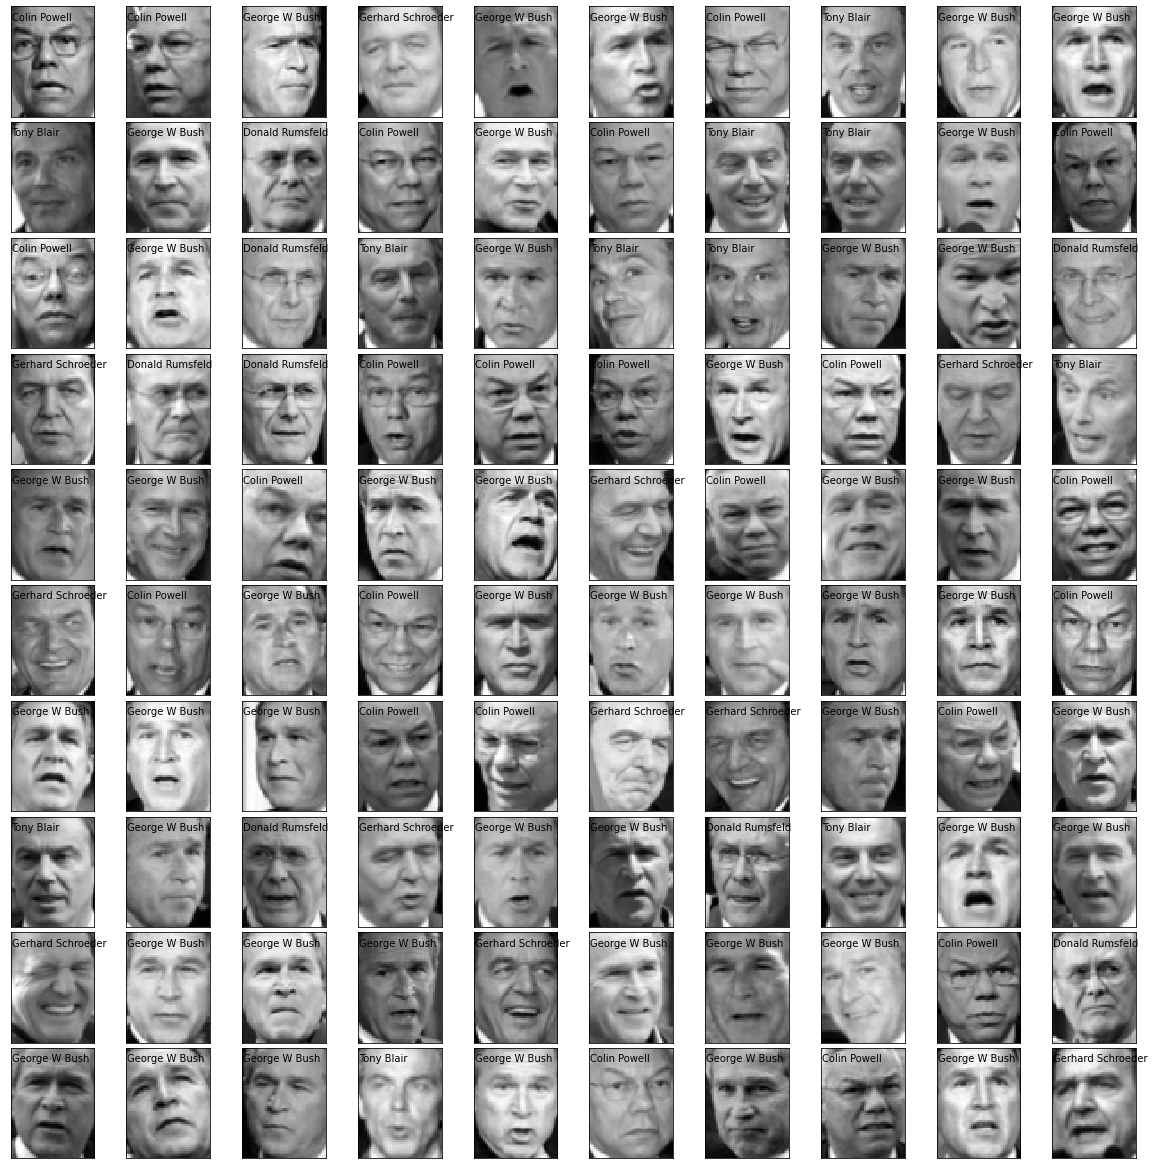

In [9]:
#import packages and load datasets

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split

# tu rysujemy twarze
# tu rysujemy twarze
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
 
for i in range(100):
 ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
 ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
 # label the image with the target value
 ax.text(0, 7, str(target_names[y_test[i]]))


## **Classify with MLP**

In [10]:

# train the model
# tu musimy zdefiniować klasyfikator, wytrenowaći sprawdzić "score" dla 
# danych testowych
#Proponowane parametry sieci: ukryte warstwy [100,100],solver adam, verbose=10 
clf = MLPClassifier(hidden_layer_sizes=(100,100), solver='adam', alpha=0.1, verbose=10, validation_fraction=0.2, early_stopping=True,n_iter_no_change=50)
                     
print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test




Iteration 1, loss = inf
Validation score: 0.233918
Iteration 2, loss = inf
Validation score: 0.450292
Iteration 3, loss = inf
Validation score: 0.245614
Iteration 4, loss = inf
Validation score: 0.461988
Iteration 5, loss = 95.37223271
Validation score: 0.391813
Iteration 6, loss = 59.65407586
Validation score: 0.450292
Iteration 7, loss = 58.88538032
Validation score: 0.116959
Iteration 8, loss = 33.00995821
Validation score: 0.497076
Iteration 9, loss = 40.66168060
Validation score: 0.368421
Iteration 10, loss = 42.98737256
Validation score: 0.456140
Iteration 11, loss = 48.23937300
Validation score: 0.122807
Iteration 12, loss = 25.89666865
Validation score: 0.479532
Iteration 13, loss = 20.48672927
Validation score: 0.403509
Iteration 14, loss = 29.07774428
Validation score: 0.362573
Iteration 15, loss = 15.29848960
Validation score: 0.502924
Iteration 16, loss = 13.86800090
Validation score: 0.333333
Iteration 17, loss = 10.80384324
Validation score: 0.502924
Iteration 18, loss = 

# **Plot loss**

[0.23391812865497075, 0.4502923976608187, 0.24561403508771928, 0.4619883040935672, 0.391812865497076, 0.4502923976608187, 0.11695906432748537, 0.49707602339181284, 0.3684210526315789, 0.45614035087719296, 0.12280701754385964, 0.47953216374269003, 0.40350877192982454, 0.36257309941520466, 0.5029239766081871, 0.3333333333333333, 0.5029239766081871, 0.3216374269005848, 0.52046783625731, 0.5672514619883041, 0.5672514619883041, 0.5614035087719298, 0.5321637426900585, 0.391812865497076, 0.5029239766081871, 0.5789473684210527, 0.4853801169590643, 0.6198830409356725, 0.6140350877192983, 0.5263157894736842, 0.631578947368421, 0.6432748538011696, 0.6198830409356725, 0.52046783625731, 0.5614035087719298, 0.6257309941520468, 0.5672514619883041, 0.631578947368421, 0.6198830409356725, 0.631578947368421, 0.45614035087719296, 0.5146198830409356, 0.49707602339181284, 0.6257309941520468, 0.5029239766081871, 0.6257309941520468, 0.52046783625731, 0.45614035087719296, 0.5614035087719298, 0.6081871345029239

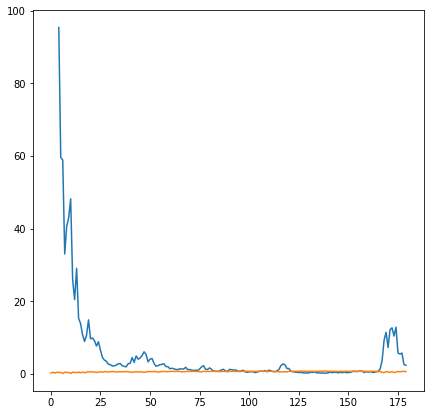

In [11]:
# tu rysujemy loss i validation score
# zostawiamy na razie puste
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

# **Plot results**


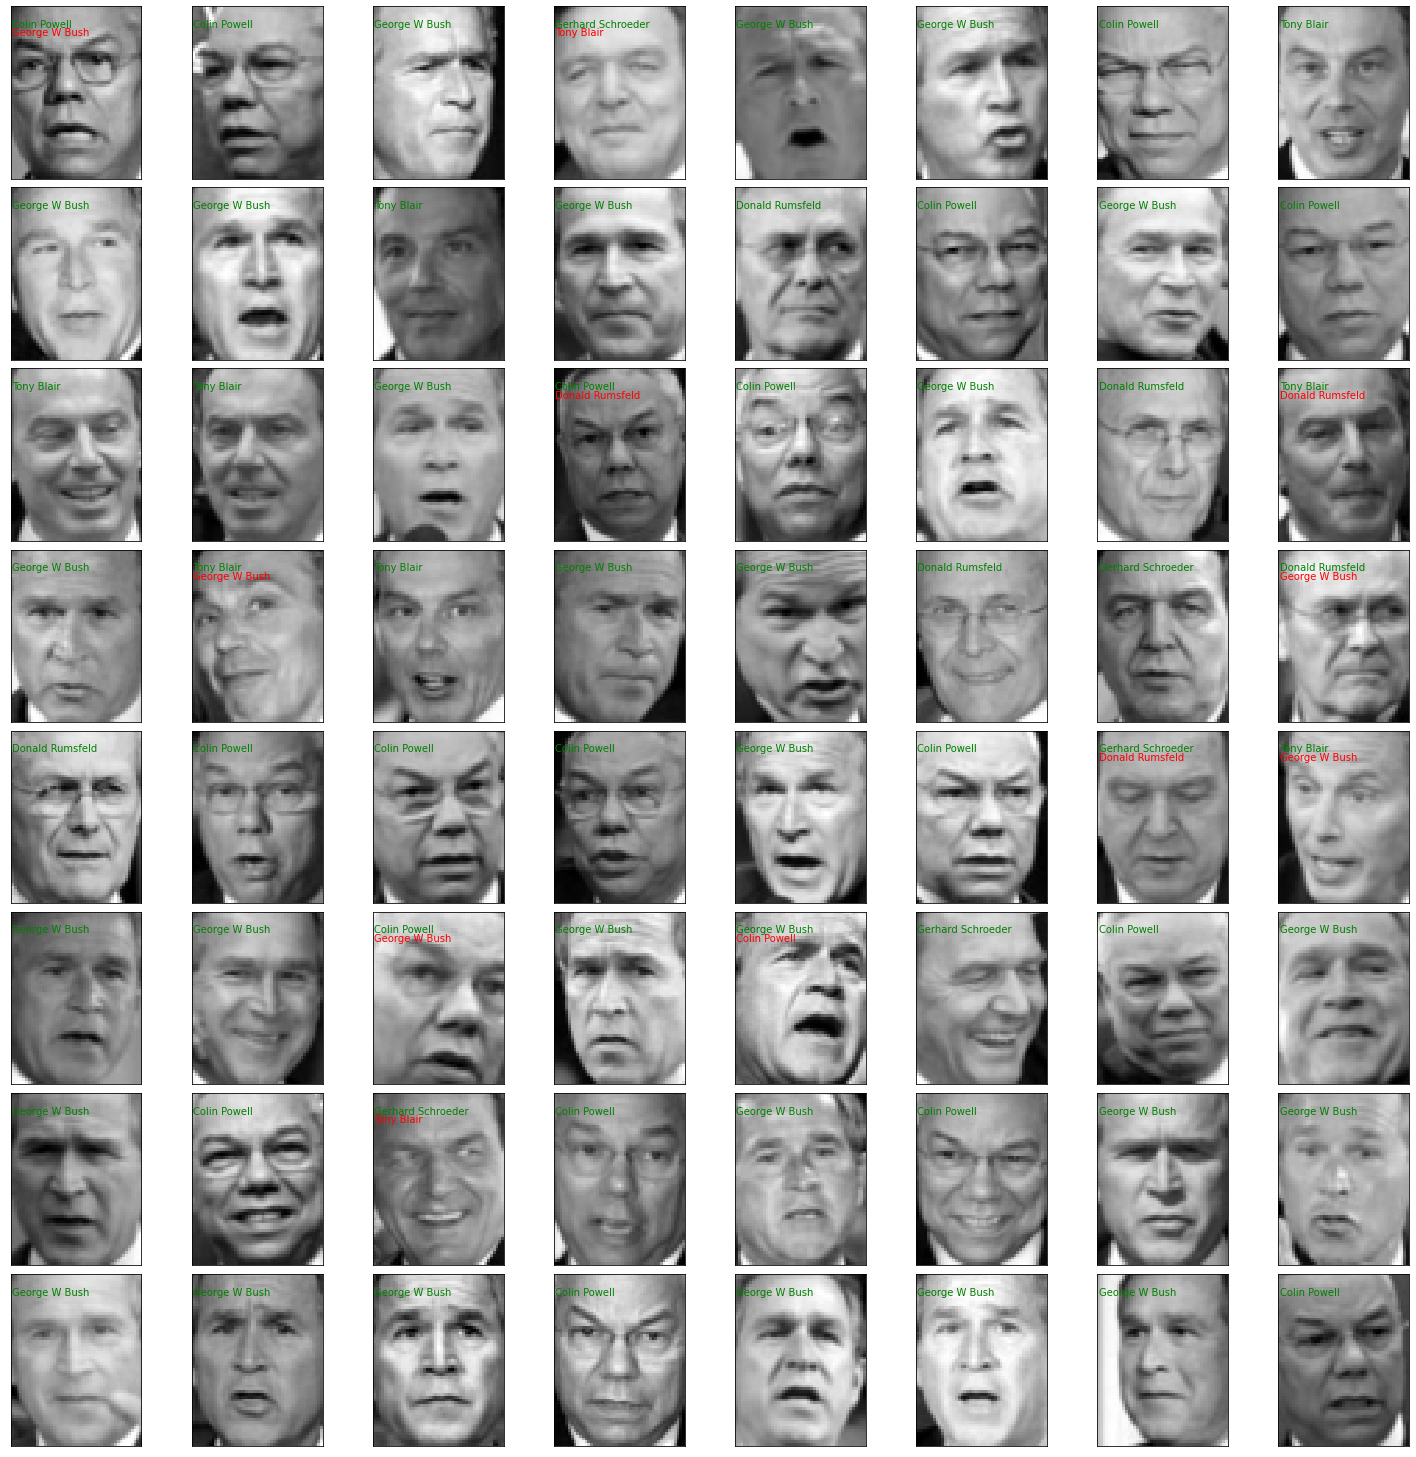

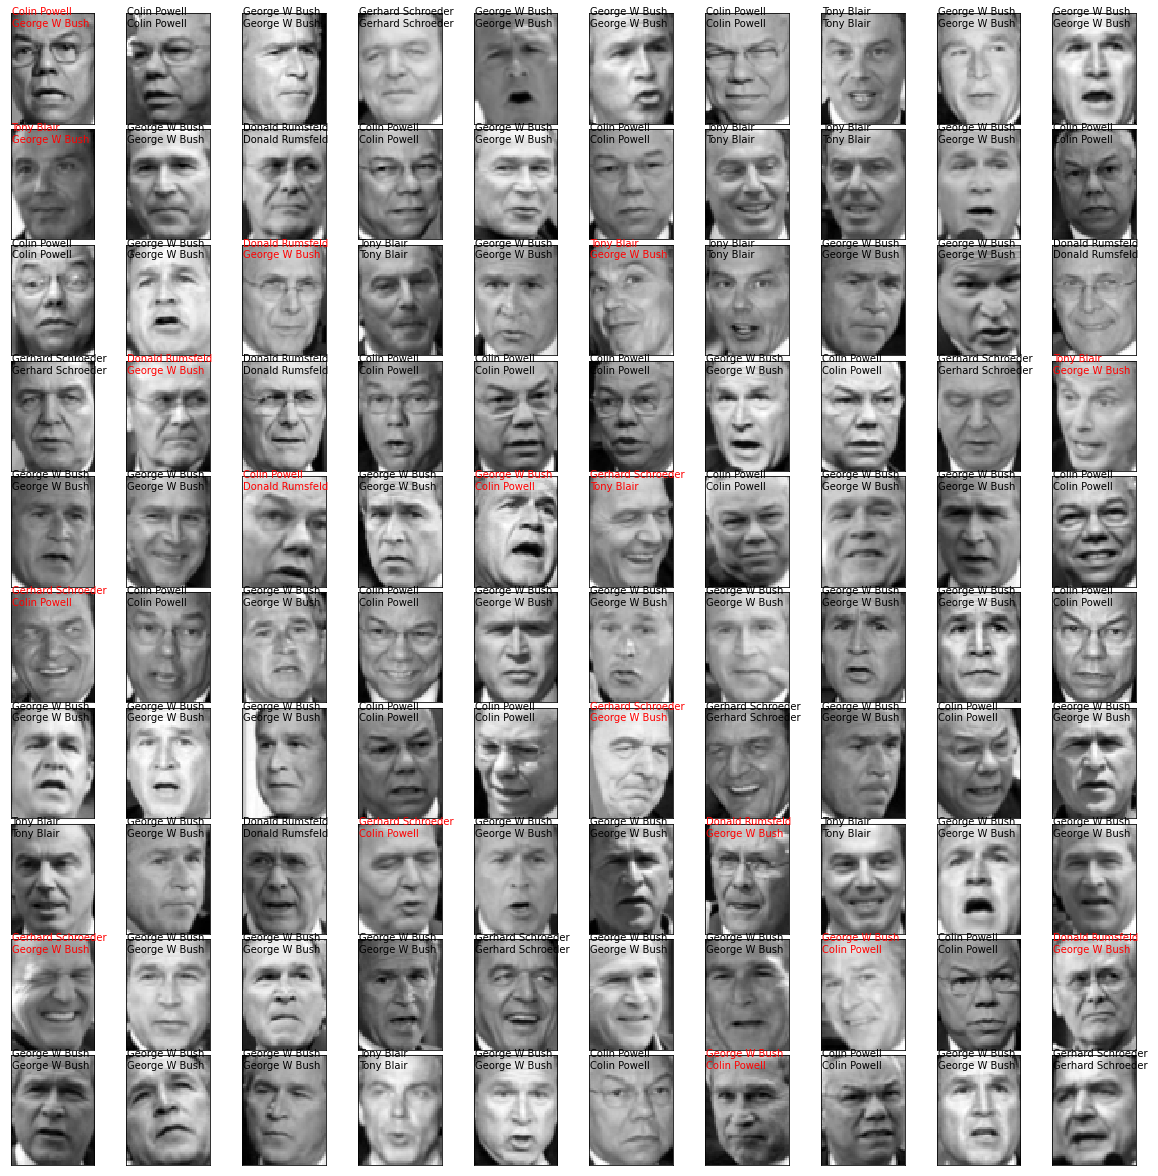

In [12]:
# Plot the prediction
#import packages and load datasets

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split

# tu rysujemy twarze
# tu rysujemy twarze
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
 
for i in range(100):
 ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
 ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
 # label the image with the target value
 if expected[i]==predicted[i]:
    ax.text(0, 7, str(target_names[expected[i]])+" \n"+str(target_names[predicted[i]]), color='black')
 else:
     ax.text(0, 7, str(target_names[expected[i]])+" \n"+str(target_names[predicted[i]]), color='red')
 


Print the classification report



In [13]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        64
           1       0.87      0.41      0.55        32
           2       0.83      0.93      0.88       127
           3       0.83      0.69      0.75        29
           4       0.68      0.76      0.71        33

    accuracy                           0.82       285
   macro avg       0.81      0.73      0.75       285
weighted avg       0.82      0.82      0.81       285



# **Print the confusion matrix (expected true label vs. the reconstructed label)**



In [14]:
print(metrics.confusion_matrix(expected, predicted))



[[ 57   1   3   0   3]
 [  2  13  11   1   5]
 [  5   1 118   1   2]
 [  3   0   4  20   2]
 [  0   0   6   2  25]]
